In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
df = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")

In [4]:
df.loc[df['BMI Category'] == 'Normal Weight', 'BMI Category'] = 'Normal'


In [5]:
df.insert(loc=2, column='Age Group', value=pd.cut(x=df['Age'], bins=[
    0, 16, 30, 45, 100], labels=['Child', 'Young Adults', 'Middle-aged Adults', 'Old Adults']))


In [6]:

def blood_pressure_targets(bp):
    result = None
    sys, dias = map(int, bp.split('/'))
    if sys < 90 or dias < 60:
        result = 'Low'
    elif sys < 120 and dias < 80:
        result = 'Normal'
    elif sys in range(120, 130) and dias < 80:
        result = 'Elevated'
    elif sys in range(130, 140) or dias in range(80, 90):
        result = 'Hypertension Stage 1'
    elif sys >= 140 or dias >= 90:
        result = 'Hypertension Stage 2'
    elif sys > 180 or dias > 120:
        result = 'Hypertensive Crisis'
    return result


def heart_rate_targets(hr):
    result = None
    if hr < 60:
        result = 'Bradycardia'
    elif hr <= 100:
        result = 'Normal'
    else:
        result = 'Tachycardia'
    return result


df['Blood Pressure'] = df['Blood Pressure'].astype(str)
idx = df.columns.get_loc('Blood Pressure') + 1
df.insert(loc=idx, column='Blood Pressure Targets',
            value=df['Blood Pressure'].apply(lambda x: blood_pressure_targets(x)))


idx = df.columns.get_loc('Heart Rate') + 1
df.insert(loc=idx, column='Heart Rate Targets',
            value=df['Heart Rate'].apply(lambda x: heart_rate_targets(x)))


In [7]:
df.head(10)

,Person ID,Gender,Age Group,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Blood Pressure Targets,Heart Rate,Heart Rate Targets,Daily Steps,Sleep Disorder
0,1,Male,Young Adults,27,Software Engineer,6.1,6,42,6,Overweight,126/83,Hypertension Stage 1,77,Normal,4200,NaN
1,2,Male,Young Adults,28,Doctor,6.2,6,60,8,Normal,125/80,Hypertension Stage 1,75,Normal,10000,NaN
2,3,Male,Young Adults,28,Doctor,6.2,6,60,8,Normal,125/80,Hypertension Stage 1,75,Normal,10000,NaN
3,4,Male,Young Adults,28,Sales Representative,5.9,4,30,8,Obese,140/90,Hypertension Stage 2,85,Normal,3000,Sleep Apnea
4,5,Male,Young Adults,28,Sales Representative,5.9,4,30,8,Obese,140/90,Hypertension Stage 2,85,Normal,3000,Sleep Apnea
5,6,Male,Young Adults,28,Software Engineer,5.9,4,30,8,Obese,140/90,Hypertension Stage 2,85,Normal,3000,Insomnia
6,7,Male,Young Adults,29,Teacher,6.3,6,40,7,Obese,140/90,Hypertension Stage 2,82,Normal,3500,Insomnia
7,8,Male,Young Adults,29,Doctor,7.8,7,75,6,Normal,120/80,Hypertension Stage 1,70,Normal,8000,NaN
8,9,Male,Young Adults,29,Doctor,7.8,7,75,6,Normal,120/80,Hypertension Stage 1,70,Normal,8000,NaN
9,10,Male,Young Adults,29,Doctor,7.8,7,75,6,Normal,120/80,Hypertension Stage 1,70,Normal,8000,NaN


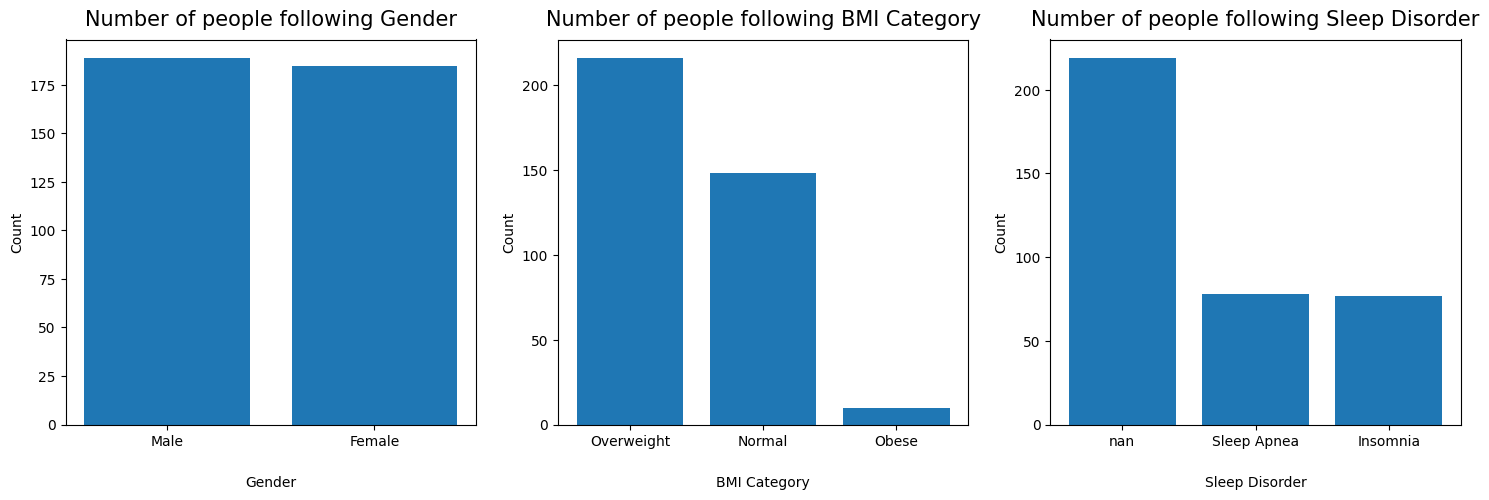

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
col_names = ['Gender', 'BMI Category', 'Sleep Disorder']
for i in range(3):
    values = df[col_names[i]].astype(str)
    axes[i].bar(values.unique(), values.value_counts())
    axes[i].set_ylabel("Count")
    axes[i].set_xlabel(col_names[i], labelpad=20)
    axes[i].set_title("Number of people following {}".format(
        col_names[i]), pad=10, fontsize=15)
plt.show()


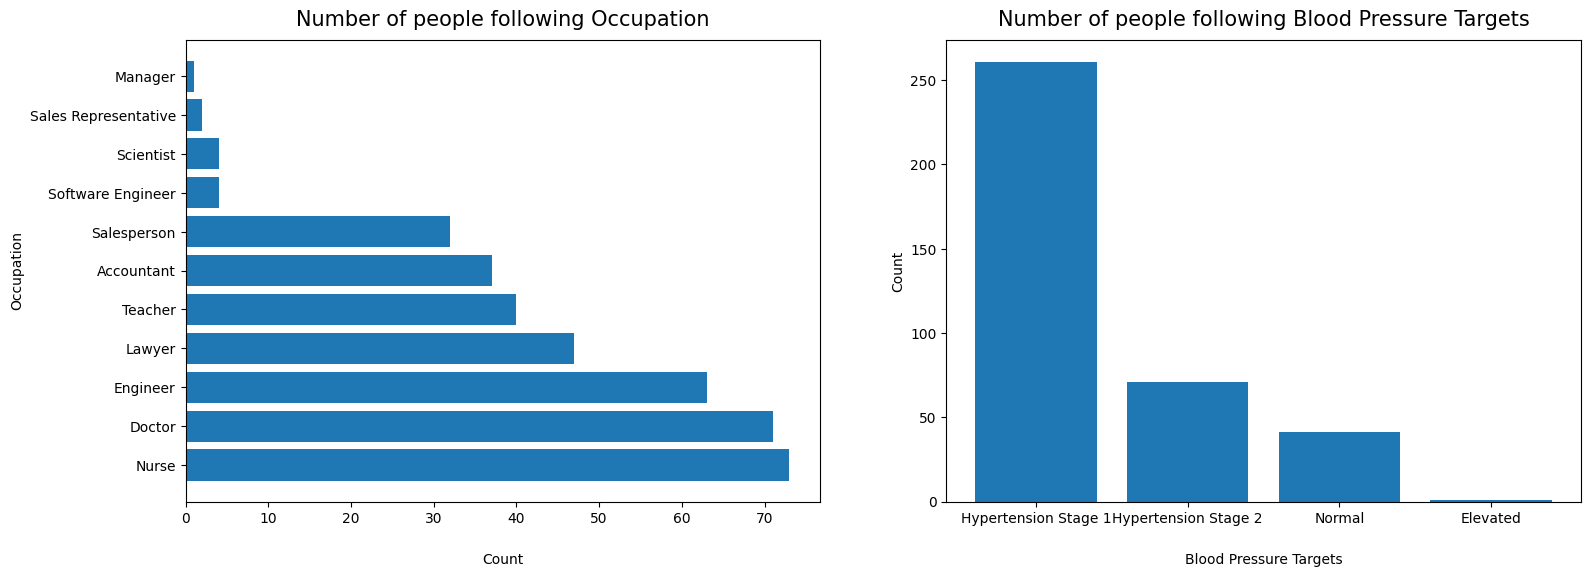

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
col_names = ['Occupation', 'Blood Pressure Targets']
for i in range(2):
    values = df[col_names[i]].value_counts()
    if i == 0:
        axes[i].barh(values.index, values)
        axes[i].set_xlabel("Count", labelpad=20)
        axes[i].set_ylabel(col_names[i])
    else:
        axes[i].bar(values.index, values)
        axes[i].set_ylabel("Count")
        axes[i].set_xlabel(col_names[i], labelpad=20)
    axes[i].set_title("Number of people following {}".format(
        col_names[i]), pad=10, fontsize=15)

plt.show()


<Figure size 1800x500 with 0 Axes>

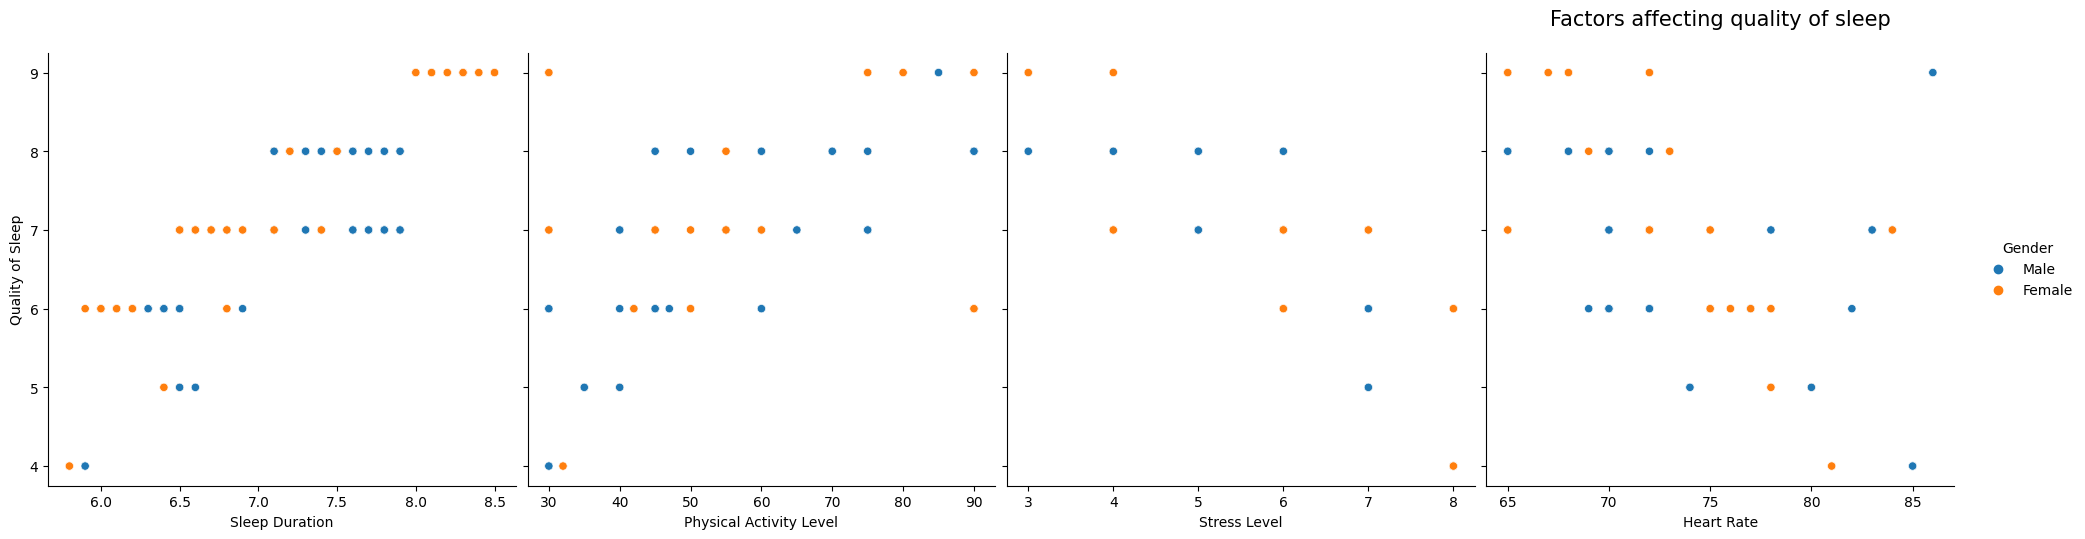

In [10]:
fig = plt.figure(figsize=(18, 5))

sns.pairplot(data=df, x_vars=['Sleep Duration', 'Physical Activity Level',
            'Stress Level', 'Heart Rate'], y_vars=['Quality of Sleep'], hue='Gender', height=5)
plt.title('Factors affecting quality of sleep', pad=20, fontsize=15)
plt.axis('tight')
plt.show()


In [11]:
effect_of_BMI_category = df.groupby(
    ['Sleep Disorder', 'BMI Category']).size().reset_index()
effect_of_BMI_category.columns = ['Sleep Disorder', 'BMI Category', 'Count']
effect_of_blood_pressure_targets = df.groupby(
    ['Sleep Disorder', 'Blood Pressure Targets']).size().reset_index()
effect_of_blood_pressure_targets.columns = [
    'Sleep Disorder', 'Blood Pressure Targets', 'Count']


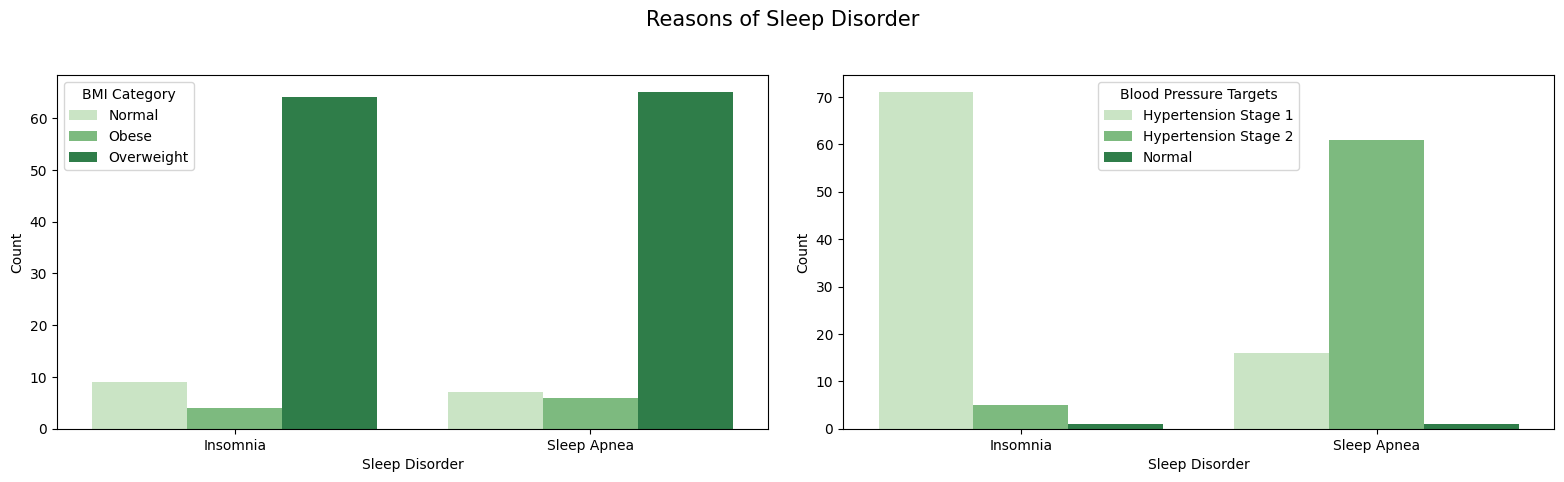

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

sns.barplot(ax=axes[0], data=effect_of_BMI_category,
            x='Sleep Disorder', y='Count', hue='BMI Category', palette="Greens")
sns.barplot(ax=axes[1], data=effect_of_blood_pressure_targets,
            x='Sleep Disorder', y='Count', hue='Blood Pressure Targets', palette="Greens")

fig.suptitle("Reasons of Sleep Disorder", fontsize=15)

plt.tight_layout(pad=2)
plt.show()


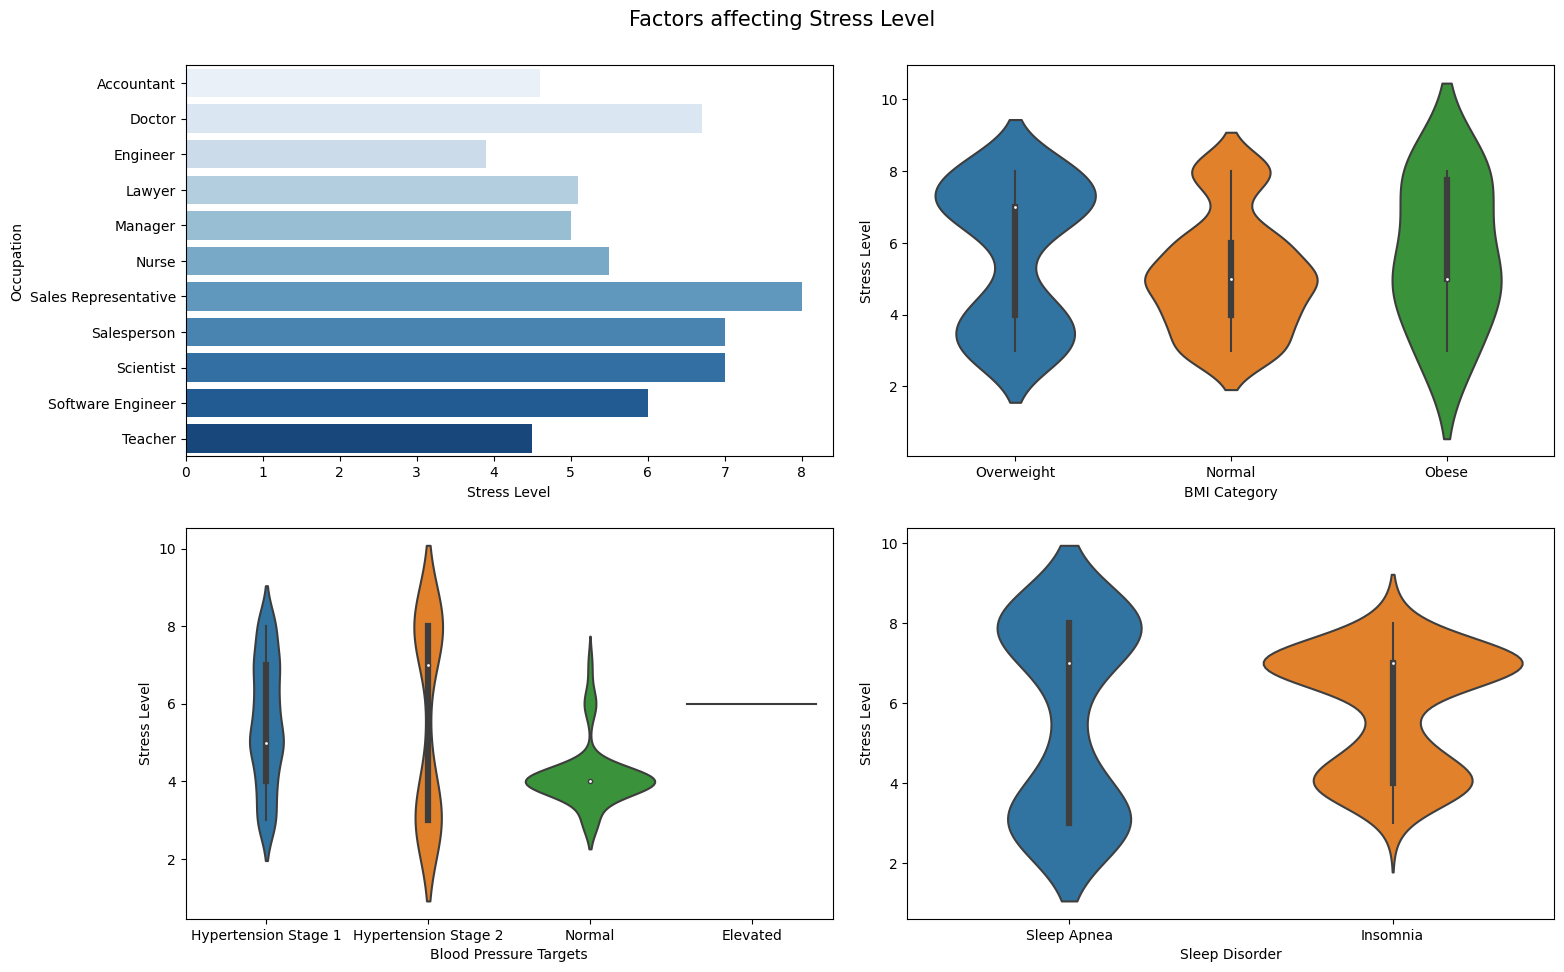

In [13]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

sns.barplot(ax=axes[0, 0], data=df.groupby('Occupation')['Stress Level'].mean().round(1).reset_index(), x='Stress Level', y='Occupation', palette="Blues") 
sns.violinplot(ax=axes[0, 1], data=df, x='BMI Category', y='Stress Level') 
sns.violinplot(ax=axes[1, 0], data=df, x='Blood Pressure Targets', y='Stress Level') 
sns.violinplot(ax=axes[1, 1], data=df, x='Sleep Disorder', y='Stress Level')

fig.suptitle("Factors affecting Stress Level", fontsize=15)

plt.tight_layout(pad=2) 
plt.show()


In [14]:
# Normalization: Sleep Duration, Quality of Sleep, Stress Level
original_SDuration = np.array(df['Sleep Duration'].tolist(), float)
normalized_SDuration = stats.boxcox(original_SDuration)

original_SQuality = np.array(df['Quality of Sleep'].tolist(), int)
normalized_SQuality = stats.boxcox(original_SQuality)

original_SLevel = np.array(df['Stress Level'].tolist(), int)
normalized_SLevel = stats.boxcox(original_SLevel)


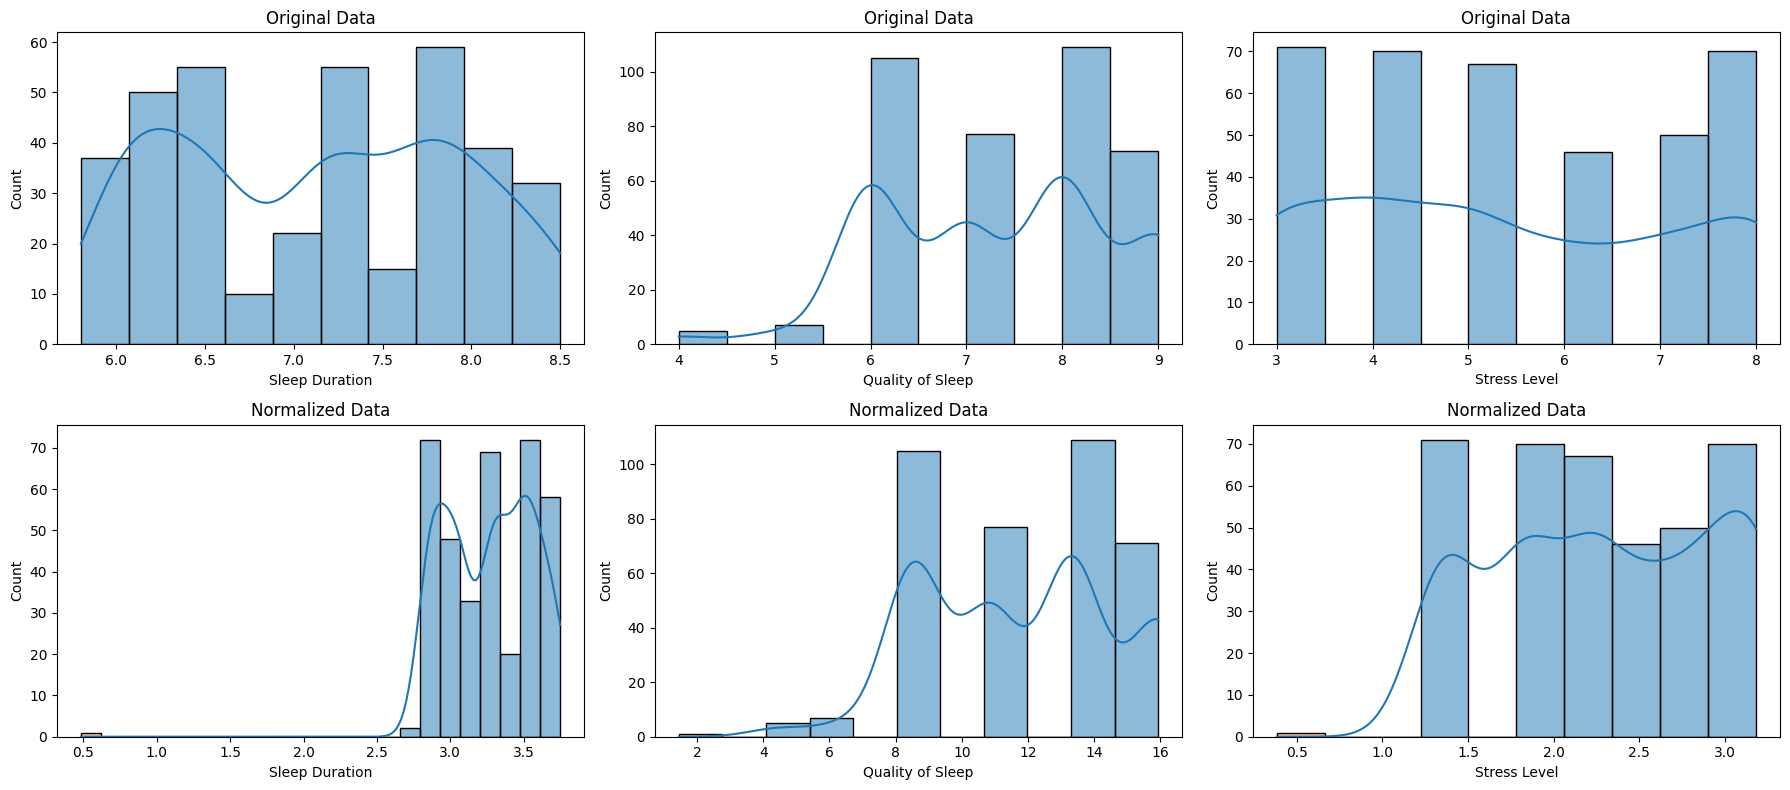

In [15]:
# Normalized data: Quality of Sleep, Stress Level

original_datas = [original_SDuration, original_SQuality, original_SLevel]
normalized_datas = [normalized_SDuration,
                    normalized_SQuality, normalized_SLevel]

fig, axes = plt.subplots(2, 3, figsize=(18, 8))
x_labels = ['Sleep Duration', 'Quality of Sleep', 'Stress Level']
titles = ['Original Data', 'Normalized Data']

for i in range(3):
    sns.histplot(original_datas[i], ax=axes[0, i], kde=True, legend=False)
    sns.histplot(normalized_datas[i], ax=axes[1, i], kde=True, legend=False)

    axes[0, i].set_title(titles[0])
    axes[1, i].set_title(titles[1])

    axes[0, i].set_xlabel(x_labels[i])
    axes[1, i].set_xlabel(x_labels[i])

plt.tight_layout()
plt.show()
